# Zomato Restaurant Dataset EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import pickle

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df = pd.read_csv('data/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.shape

(51717, 17)

We can drop features like 'url' and 'phone' from the dataset

In [6]:
df.drop(['url','phone'],axis=1,inplace=True)

In [7]:
df.shape

(51717, 15)

### Check Null Values

In [8]:
df.isnull().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

We will drop null values

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum().sum() ### no null presents in dataset after null values removal

0

### Check Duplicates

In [11]:
df.duplicated().sum()

11

In [12]:
df.drop_duplicates(inplace=True)  ## dropping duplicate records

In [13]:
df.shape

(23395, 15)

### Check data types

In [14]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

we have to transform these values into number format

In [15]:
## replacing commas 
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x : x.replace(',','')) 

In [16]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1200', '150', '350', '250', '1500', '1300',
       '1000', '100', '900', '1100', '1600', '950', '230', '1700', '1400',
       '1350', '2200', '2000', '1800', '1900', '180', '330', '2500',
       '2100', '3000', '2800', '3400', '40', '1250', '3500', '4000',
       '2400', '1450', '3200', '6000', '1050', '4100', '2300', '120',
       '2600', '5000', '3700', '1650', '2700', '4500'], dtype=object)

In [17]:
## converting object to float 
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype('float')

In [18]:
df.dtypes

address                         object
name                            object
online_order                    object
book_table                      object
rate                            object
votes                            int64
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [19]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [20]:
### replacing '/5'
df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))

In [21]:
df[df['rate']=='NEW'].shape[0]

147

As we can see, there are 147 records where ratings hasn't been recorded . so we can drop these records and then proceed with remaining rows

In [22]:
df = df[df['rate'] != 'NEW']
df.shape

(23248, 15)

In [23]:
## converting object to float datatype
df['rate'] = df['rate'].astype('float')

In [24]:
df.dtypes

address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

### Rename Feature names

In [25]:
df.rename(columns={'approx_cost(for two people)':'cost',
                  'listed_in(type)':'type',
                  'listed_in(city)':'city'},inplace = True)

In [26]:
df.head(2)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


## Data Visualizations

### 1. Most Famous Food chains present in banglore

In [27]:
##top 20 food outlets
top20_foodchains = df['name'].value_counts()[:20]
top20_foodchains

Onesta                    85
Empire Restaurant         67
KFC                       59
McDonald's                57
Pizza Hut                 56
Domino's Pizza            55
Faasos                    54
Smally's Resto Cafe       54
Corner House Ice Cream    52
Burger King               51
Polar Bear                48
Smoor                     47
Mani's Dum Biryani        47
Pizza Stop                46
Subway                    45
Chung Wah                 45
Mainland China            45
eat.fit                   44
Hammered                  44
Lakeview Milkbar          44
Name: name, dtype: int64

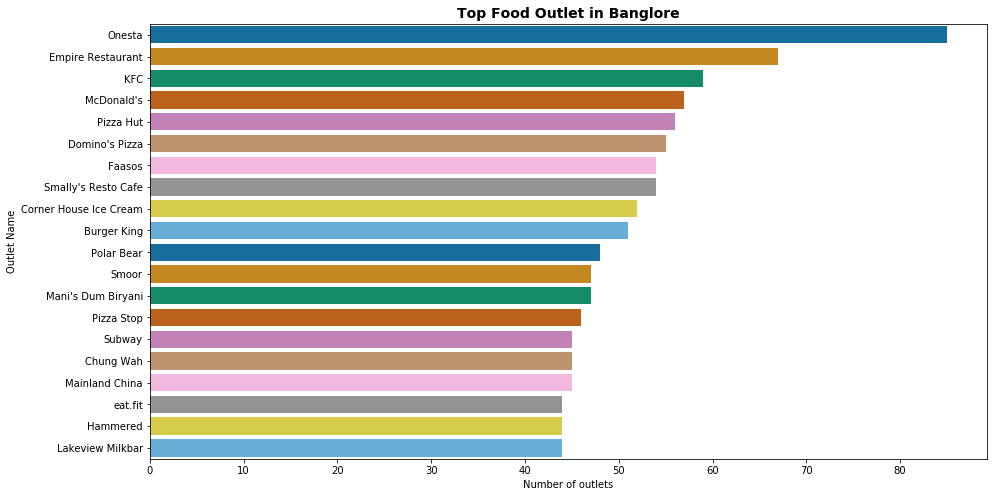

In [28]:
plt.figure(figsize=(15,8))

sns.barplot(x=top20_foodchains.values, y = top20_foodchains.index, palette='colorblind')
#plt.barh(y=top20_foodchains.index,width=top20_foodchains.values,color='midnightblue')

plt.xlabel('Number of outlets')
plt.ylabel('Outlet Name')
plt.title('Top Food Outlet in Banglore',fontsize=14,fontweight='bold')
plt.show();

### 2. Restaurant offers table booking or not

In [29]:
df['book_table'].value_counts()

No     17191
Yes     6057
Name: book_table, dtype: int64

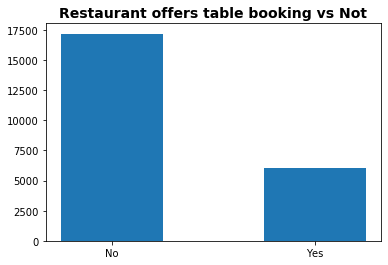

In [30]:
plt.figure(figsize=(6,4))
plt.bar(x=df['book_table'].value_counts().index,height=df['book_table'].value_counts().values,width=0.5)

plt.title('Restaurant offers table booking vs Not',fontsize=14,fontweight='bold')
plt.show();

### 3. Restaurant Delivers online or not

In [31]:
df['online_order'].value_counts()

Yes    16378
No      6870
Name: online_order, dtype: int64

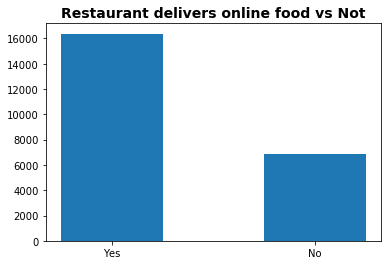

In [32]:
plt.figure(figsize=(6,4))
plt.bar(x=df['online_order'].value_counts().index,
        height=df['online_order'].value_counts().values,width=0.5)

plt.title('Restaurant delivers online food vs Not',fontsize=14,fontweight='bold')
plt.show();

### 4. Rating Distribution

In [33]:
df['rate'].value_counts()

3.9    3246
4.0    2902
4.1    2827
3.8    2483
4.2    2124
4.3    1680
3.7    1646
4.4    1142
3.6     878
4.5     648
3.5     482
3.4     351
2.8     321
2.9     313
3.1     307
4.6     300
3.0     291
3.2     250
3.3     219
2.7     190
4.7     167
2.6     138
4.8      66
2.5      57
4.9      55
2.4      54
2.3      45
2.2      26
2.1      24
2.0      11
1.8       5
Name: rate, dtype: int64

In [34]:
df['rate'].describe().T

count    23248.000000
mean         3.905781
std          0.426153
min          1.800000
25%          3.800000
50%          4.000000
75%          4.200000
max          4.900000
Name: rate, dtype: float64

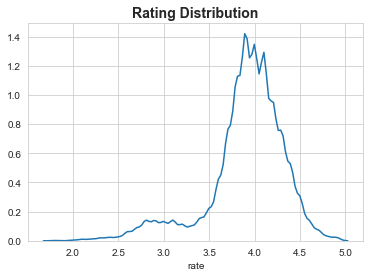

In [35]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.distplot(df['rate'],hist=False)
plt.title('Rating Distribution',fontsize=14,fontweight='bold')
plt.show();

### 5. Service Type

In [36]:
service_type = df['type'].value_counts()
service_type

Delivery              10657
Dine-out               8006
Desserts               1364
Cafes                  1066
Drinks & nightlife      879
Buffet                  753
Pubs and bars           523
Name: type, dtype: int64

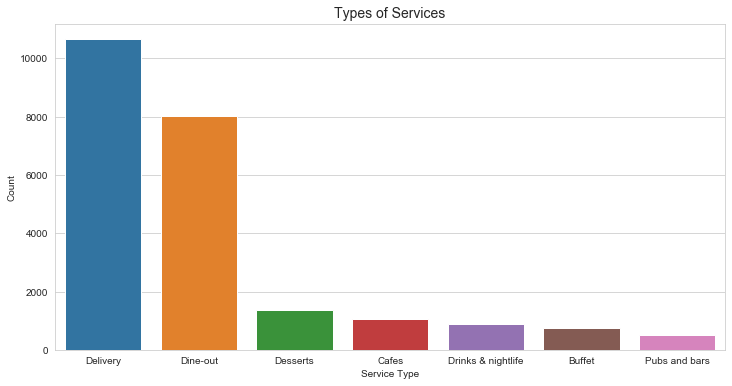

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(x=service_type.index, y=service_type.values)
plt.xlabel('Service Type')
plt.ylabel('Count')
plt.title('Types of Services',fontsize=14)
plt.show()

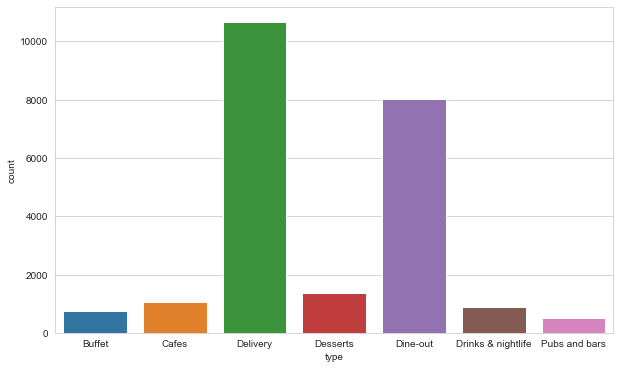

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(df['type']);

### 6. Distribution of cost of meal for 2 people

In [39]:
df['cost'].describe()

count    23248.000000
mean       753.500946
std        520.472169
min         40.000000
25%        400.000000
50%        600.000000
75%       1000.000000
max       6000.000000
Name: cost, dtype: float64

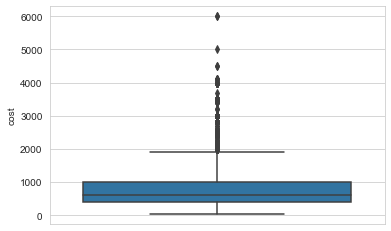

In [40]:
sns.boxplot(df['cost'],orient='v');

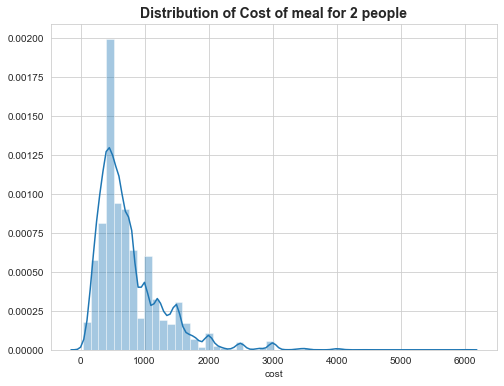

In [41]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.distplot(df['cost'])
plt.title('Distribution of Cost of meal for 2 people',fontsize=14,fontweight='bold')
plt.show();

### 7. Most liked Dishes in banglore

In [42]:
df['dish_liked']

0        Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1        Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2        Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                              Masala Dosa
4                                      Panipuri, Gol Gappe
                               ...                        
51705    Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...
51707                                     Rooftop Ambience
51708    Salads, Coffee, Breakfast Buffet, Halwa, Chick...
51711                                 Biryani, Andhra Meal
51715                         Cocktails, Pizza, Buttermilk
Name: dish_liked, Length: 23248, dtype: object

In [43]:
df.index = range(df.shape[0])  ## reassigning index because many rows have been removed in between

In [44]:
dishes_list = list()
for i in range(df.shape[0]):
    dish_split = re.split(',',df['dish_liked'][i])
    for dish in dish_split:
        dishes_list.append(dish)


In [45]:
print(dishes_list[:10])
print("***********************************************")
print(len(dishes_list))

['Pasta', ' Lunch Buffet', ' Masala Papad', ' Paneer Lajawab', ' Tomato Shorba', ' Dum Biryani', ' Sweet Corn Soup', 'Momos', ' Lunch Buffet', ' Chocolate Nirvana']
***********************************************
126848


In [46]:
dishes_liked = pd.DataFrame(dishes_list,columns=['dish_liked'])
dishes_liked.head()

,dish_liked
0,Pasta
1,Lunch Buffet
2,Masala Papad
3,Paneer Lajawab
4,Tomato Shorba


In [47]:
dishes_liked.nunique()

dish_liked    3494
dtype: int64

In [48]:
dishes_count = dishes_liked['dish_liked'].value_counts()
dishes_count_15 = dishes_count[:15]
dishes_count_15

 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
Name: dish_liked, dtype: int64

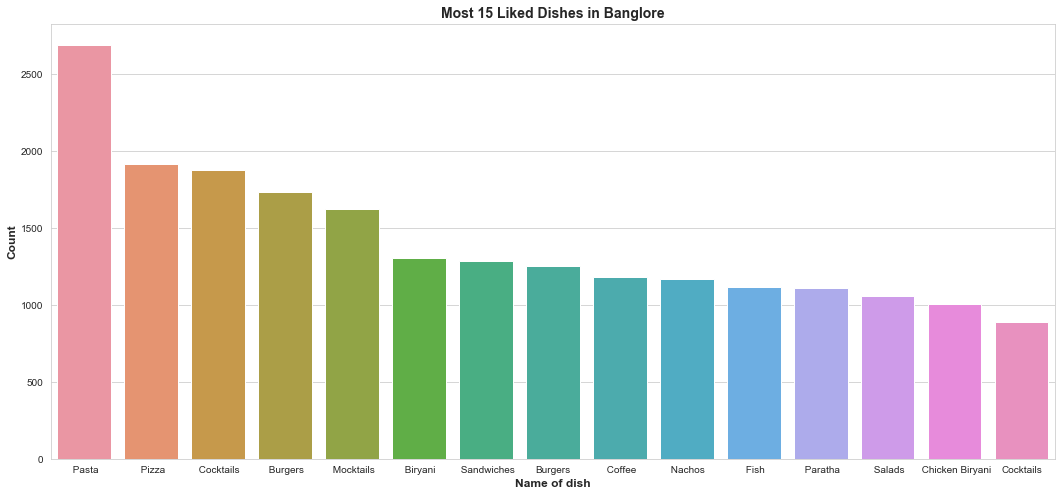

In [49]:
plt.figure(figsize=(18,8))
sns.barplot(x=dishes_count_15.index, y=dishes_count_15.values)
plt.xlabel('Name of dish',fontsize=12,fontweight='bold')
plt.ylabel('Count',fontsize=12,fontweight='bold')
plt.title('Most 15 Liked Dishes in Banglore',fontsize=14,fontweight='bold')
plt.show()

We can see from above plot that **Pasta, Pizza, Cocktails , Burgers and Mocktails** are most liked dishes in banglore. 
So a new restaurant should consider these dishes in their menu card to attract more customers and generate more revenue

### 8. Types of restaurant Presents in banglore

In [50]:
df['rest_type'].nunique()

73

In [51]:
rest_type_15 = df['rest_type'].value_counts().head(15)
rest_type_15

Casual Dining          7326
Quick Bites            5250
Cafe                   2375
Dessert Parlor         1083
Casual Dining, Bar      985
Delivery                704
Bar                     358
Takeaway, Delivery      342
Bar, Casual Dining      336
Pub                     324
Fine Dining             311
Casual Dining, Cafe     304
Lounge                  298
Pub, Casual Dining      224
Food Court              220
Name: rest_type, dtype: int64

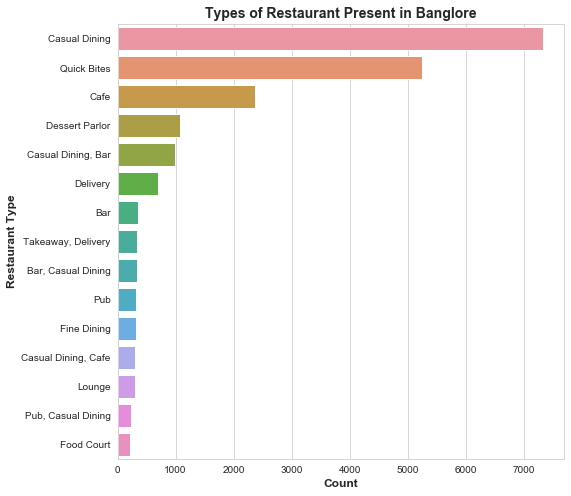

In [52]:
plt.figure(figsize=(8,8))
sns.barplot(y=rest_type_15.index, x=rest_type_15.values,orient='h')
plt.ylabel('Restaurant Type',fontsize=12,fontweight='bold')
plt.xlabel('Count',fontsize=12,fontweight='bold')
plt.title('Types of Restaurant Present in Banglore',fontsize=14,fontweight='bold')
plt.show()

**Casual Dining and Quick Bites** are the 2 topmost restro available in bangluru 

## Model Building

In [53]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [54]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

We will select only below columns for our model building step

In [55]:
columns = ['online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost']

df_new = df[columns]

df_new.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0


In [56]:
df_new.shape

(23248, 8)

In [57]:
x = df_new.drop(['rate'],axis=1)
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost
0,Yes,Yes,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0
1,Yes,No,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0
2,Yes,No,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0
3,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0
4,No,No,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0


In [58]:
x.shape

(23248, 7)

In [59]:
y = df_new['rate']
y.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [60]:
y.shape

(23248,)

### Convert Categorical feature into Numerical feature

In [61]:
for col in ['book_table','online_order']:
    print(x[col].value_counts())
    print("******************************************************")
    print("******************************************************")

No     17191
Yes     6057
Name: book_table, dtype: int64
******************************************************
******************************************************
Yes    16378
No      6870
Name: online_order, dtype: int64
******************************************************
******************************************************


In [62]:
feature_map = {'Yes':1, 'No':0}

In [63]:
x['book_table'] = x['book_table'].map(feature_map)
x['online_order'] = x['online_order'].map(feature_map)

In [64]:
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost
0,1,1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0
1,1,0,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0
2,1,0,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0
3,0,0,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0
4,0,0,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0


###  Label Encoding

In [65]:
le = LabelEncoder()

In [66]:
print(x['cuisines'].nunique())

1681


In [67]:
x['cuisines'].value_counts()

North Indian                                                           1152
North Indian, Chinese                                                   778
South Indian                                                            366
Cafe                                                                    285
South Indian, North Indian, Chinese                                     233
                                                                       ... 
Cafe, Healthy Food, Fast Food, Beverages                                  1
BBQ, Arabian, Rolls, Chinese, North Indian, Juices, Kebab, Desserts       1
Biryani, Mughlai, Andhra                                                  1
Mughlai, Chinese, Kebab                                                   1
Hyderabadi, Biryani, North Indian, Chinese                                1
Name: cuisines, Length: 1681, dtype: int64

In [68]:
x['cuisines'] = le.fit_transform(x['cuisines'])

In [69]:
x['location'].nunique()

88

In [70]:
x['location'].value_counts()

Koramangala 5th Block    1776
BTM                      1472
Indiranagar              1355
HSR                      1170
Jayanagar                1060
                         ... 
Kanakapura Road             2
Magadi Road                 2
Yelahanka                   2
West Bangalore              2
KR Puram                    1
Name: location, Length: 88, dtype: int64

In [71]:
x['location'] = le.fit_transform(x['location'])

In [72]:
x['rest_type'].nunique()

73

In [73]:
x['rest_type'].value_counts()

Casual Dining                7326
Quick Bites                  5250
Cafe                         2375
Dessert Parlor               1083
Casual Dining, Bar            985
                             ... 
Bar, Pub                        5
Club, Casual Dining             4
Dessert Parlor, Kiosk           2
Dhaba                           1
Food Court, Casual Dining       1
Name: rest_type, Length: 73, dtype: int64

In [74]:
x['rest_type'] = le.fit_transform(x['rest_type'])

In [75]:
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost
0,1,1,775,1,20,1386,800.0
1,1,0,787,1,20,594,800.0
2,1,0,918,1,16,484,800.0
3,0,0,88,1,62,1587,300.0
4,0,0,166,4,20,1406,600.0


In [76]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23248 entries, 0 to 23247
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  23248 non-null  int64  
 1   book_table    23248 non-null  int64  
 2   votes         23248 non-null  int64  
 3   location      23248 non-null  int32  
 4   rest_type     23248 non-null  int32  
 5   cuisines      23248 non-null  int32  
 6   cost          23248 non-null  float64
dtypes: float64(1), int32(3), int64(3)
memory usage: 999.1 KB


In [77]:
y.dtypes

dtype('float64')

### Train Test Split

In [78]:
print(df_new.shape[0]*0.75)

print(df_new.shape[0]*0.25)

17436.0
5812.0


In [79]:
print(x.shape)
print(y.shape)

(23248, 7)
(23248,)


In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=101,shuffle=True)

print("train dataset shape : ",x_train.shape)
print("train dataset shape : ",y_train.shape)
print("test dataset shape : ",x_test.shape)
print("test dataset shape : ",y_test.shape)

train dataset shape :  (17436, 7)
train dataset shape :  (17436,)
test dataset shape :  (5812, 7)
test dataset shape :  (5812,)


##### Linear Regression Model

In [81]:
LR_model = LinearRegression()
LR_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
y_train_pred = LR_model.predict(x_train)
y_test_pred = LR_model.predict(x_test)

In [83]:
print("Train score : ",r2_score(y_train,y_train_pred)*100)
print("Test Score : ",r2_score(y_test,y_test_pred)*100)

Train score :  22.626750282538456
Test Score :  22.36495120902806


##### Random Forest Model

In [84]:
%%time
RF_model = RandomForestRegressor(n_estimators=500,random_state=101,min_samples_leaf=0.0001)
RF_model.fit(x_train,y_train)

Wall time: 25.5 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.0001,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=101, verbose=0, warm_start=False)

In [85]:
y_train_pred = RF_model.predict(x_train)
y_test_pred = RF_model.predict(x_test)

In [86]:
print("Train score : ",r2_score(y_train,y_train_pred)*100)
print("Test Score : ",r2_score(y_test,y_test_pred)*100)

Train score :  97.0338876969172
Test Score :  89.84133314528127


##### Extra Tree Regressor Model

In [87]:
%%time
ET_model = ExtraTreesRegressor(n_estimators=150,random_state=101)
ET_model.fit(x_train,y_train)

Wall time: 4.6 s


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=150, n_jobs=None, oob_score=False,
                    random_state=101, verbose=0, warm_start=False)

In [88]:
y_train_pred = ET_model.predict(x_train)
y_test_pred = ET_model.predict(x_test)

In [89]:
print("Train score : ",r2_score(y_train,y_train_pred)*100)
print("Test Score : ",r2_score(y_test,y_test_pred)*100)

Train score :  99.96137880235018
Test Score :  93.99033150560135


As we can see, ExtraTreeRegressor has performed well among all of the above models. So we will save this model

### Save Dataset and Model file

In [90]:
df_zomato = pd.concat([x,y],axis=1)
df_zomato.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,rate
0,1,1,775,1,20,1386,800.0,4.1
1,1,0,787,1,20,594,800.0,4.1
2,1,0,918,1,16,484,800.0,3.8
3,0,0,88,1,62,1587,300.0,3.7
4,0,0,166,4,20,1406,600.0,3.8


In [91]:
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23248 entries, 0 to 23247
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  23248 non-null  int64  
 1   book_table    23248 non-null  int64  
 2   votes         23248 non-null  int64  
 3   location      23248 non-null  int32  
 4   rest_type     23248 non-null  int32  
 5   cuisines      23248 non-null  int32  
 6   cost          23248 non-null  float64
 7   rate          23248 non-null  float64
dtypes: float64(2), int32(3), int64(3)
memory usage: 1.2 MB


In [92]:
df_zomato.to_csv('data/data_zomato.csv')

In [93]:
pickle.dump(ET_model,open('model/model.pkl','wb'))

In [99]:
x_test.iloc[1].values

array([  1.,   0.,  40.,  41.,  29., 282., 600.])

In [101]:
ET_model.predict([[1,0,34,40,23,274,800]])

array([3.64673333])